**CO543 - Image Processing**

**Lab 03**

**Apply Denoising Filters**

1. Apply Mean filtering with mask size 3x3 and 5x5

In [96]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.util import random_noise

In [97]:
# Defining required functions
def show_2_images(image1, image2, title1, title2):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    plt.show()

def show_3_images(image1, image2, image3, title1, title2, title3):
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    ax[2].imshow( image3, cmap='gray')
    ax[2].set_title(title3)

    plt.show()

def plot_histogram(image, title, main_title):
    # Convert image to grayscale if it is not already
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Convert image to uint8 if it is not already
    if image.dtype != np.uint8:
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        image = image.astype(np.uint8)
    
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.suptitle(main_title)

    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), 256, [0, 256], color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()

In [98]:
def mean_filter(image, mask_size):
    # Create a padded image to handle borders
    pad_size = mask_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Initialize the output image
    filtered_image = np.zeros_like(image)
    
    # Get the dimensions of the image
    rows, cols = image.shape
    
    # Apply the mean filter
    for i in range(rows):
        for j in range(cols):
            # Extract the region of interest
            roi = padded_image[i:i+mask_size, j:j+mask_size]
            # Compute the mean value of the region
            mean_value = np.mean(roi)
            # Set the mean value to the corresponding pixel in the output image
            filtered_image[i, j] = mean_value
    
    return filtered_image

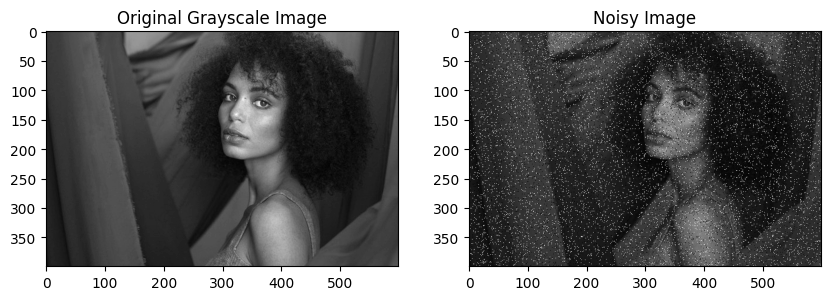

In [131]:
img = plt.imread('image.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noisy_image = random_noise(gray_img, mode='s&p', amount=0.07)

show_2_images(gray_img,noisy_image,"Original Grayscale Image","Noisy Image")

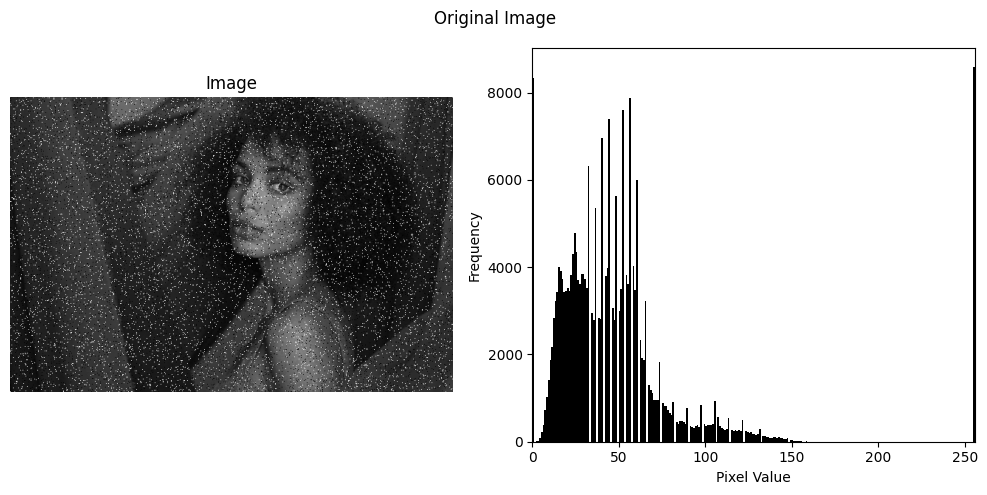

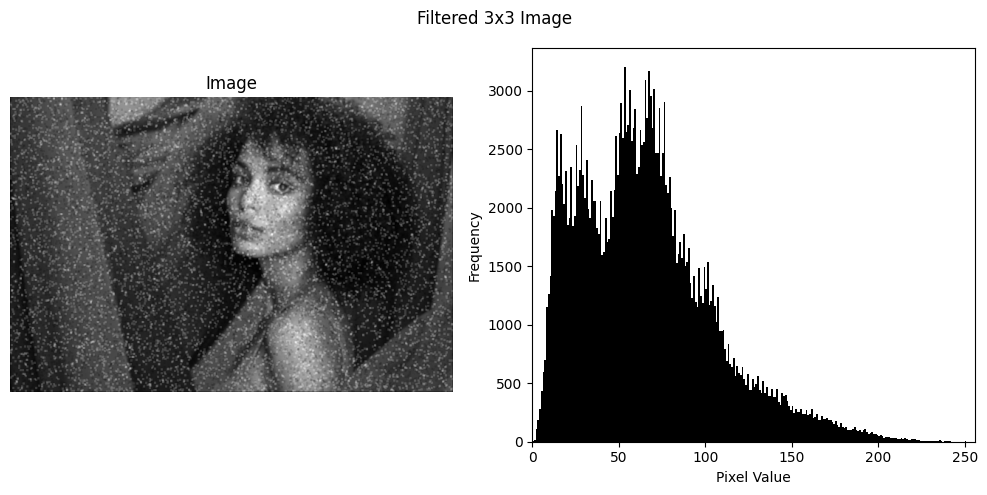

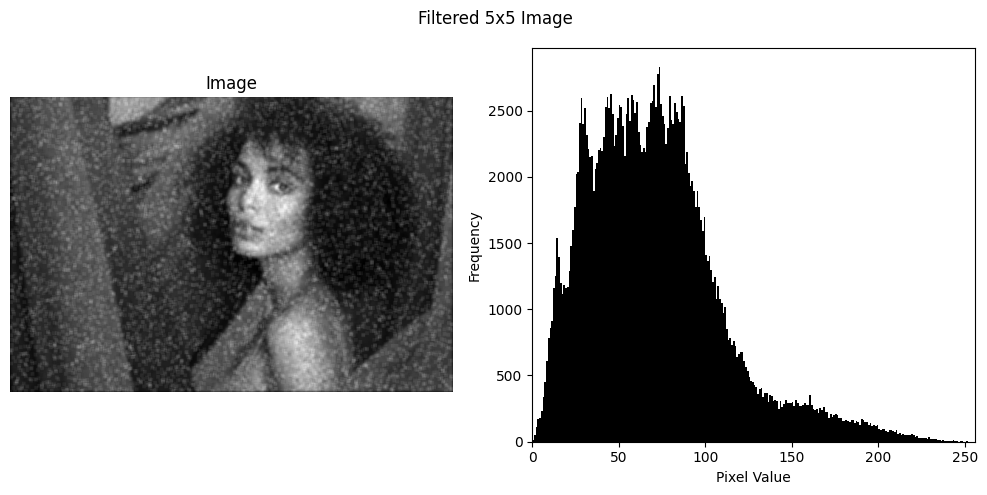

In [100]:
mean_3x3 = mean_filter(gray_img,3)
mean_5x5 = mean_filter(gray_img,5)
plot_histogram(gray_img,"","Original Image")
plot_histogram(mean_3x3,"","Filtered 3x3 Image")
plot_histogram(mean_5x5,"","Filtered 5x5 Image")


2. Apply Highpass filtering with mask size 3x3 and 5x5

In [101]:
# Create a highpass filter kernel
def high_pass_filter(image, kernel_size):
    kernel = -np.ones((kernel_size, kernel_size), dtype=float)
    kernel[kernel_size // 2, kernel_size // 2] = kernel_size * kernel_size - 1
    
    return convolve2d(image, kernel)

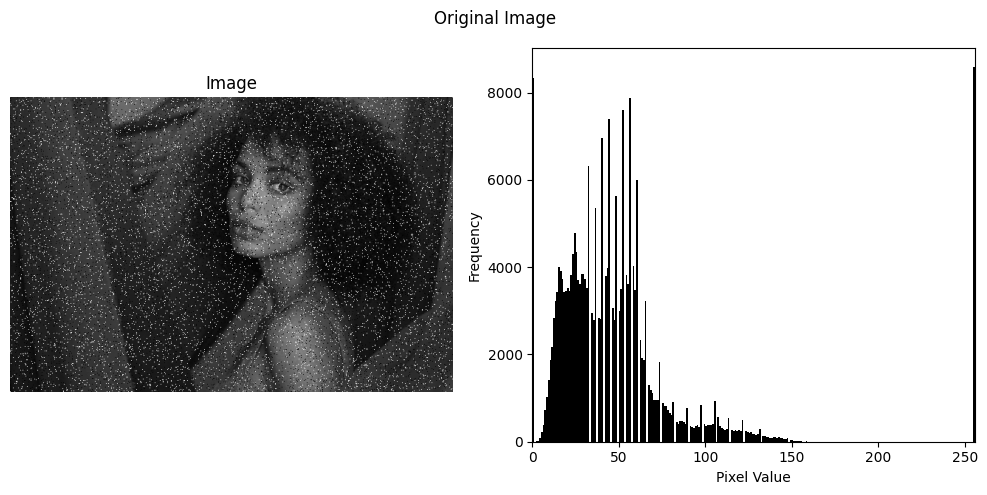

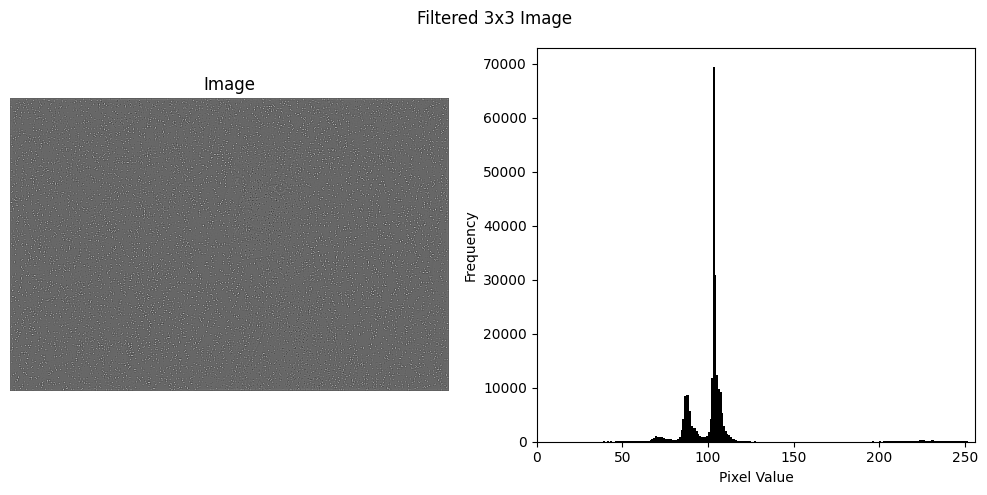

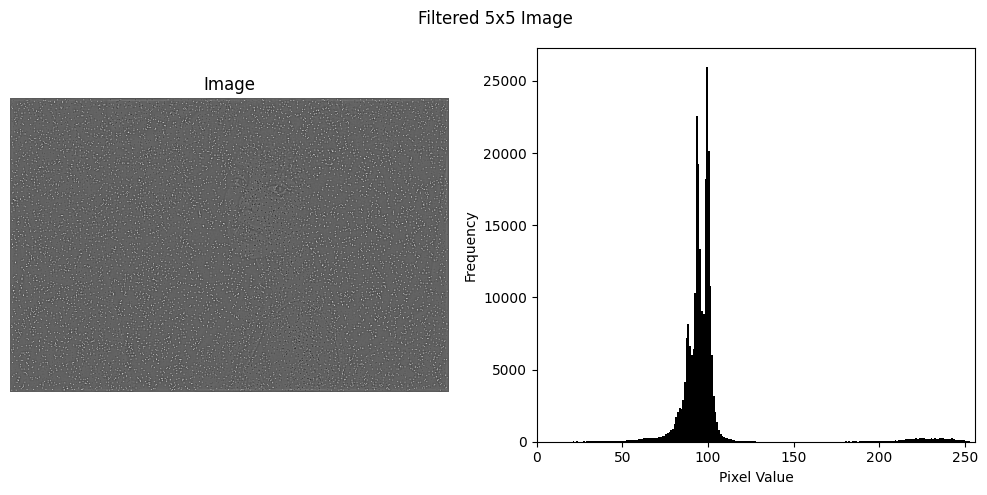

In [102]:
hp_3x3 = high_pass_filter(gray_img,3)
hp_5x5 = high_pass_filter(gray_img,5)
plot_histogram(gray_img,"","Original Image")
plot_histogram(hp_3x3,"","Filtered 3x3 Image")
plot_histogram(hp_5x5,"","Filtered 5x5 Image")

3. Apply lowpass filtering with mask size 3x3 and 5x5

In [109]:
def low_pass_filter(image, kernel_size):
    # Create an averaging filter kernel
    kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)
    
    # Apply the convolution
    filtered_image = convolve2d(image, kernel, mode='same', boundary='wrap')
    
    # Normalize the filtered image
    filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image)) * 255
    
    return filtered_image.astype(np.uint8)

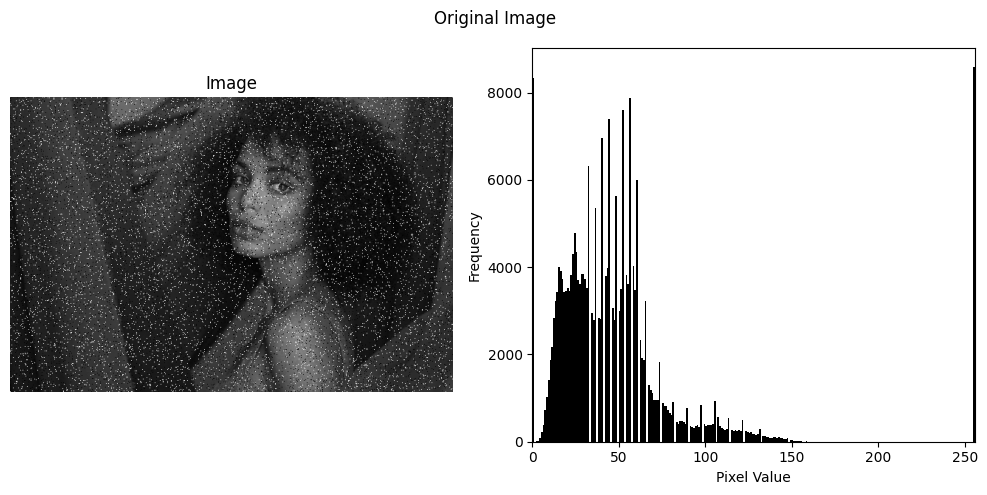

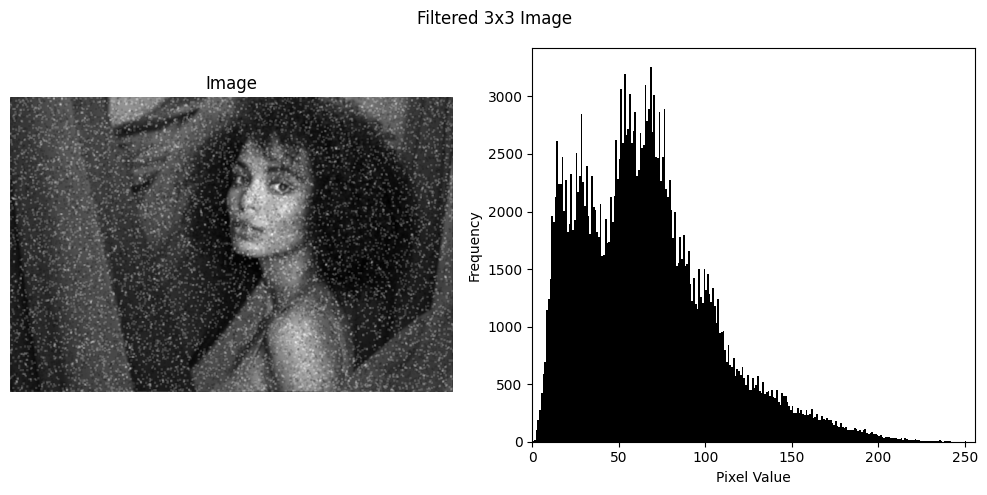

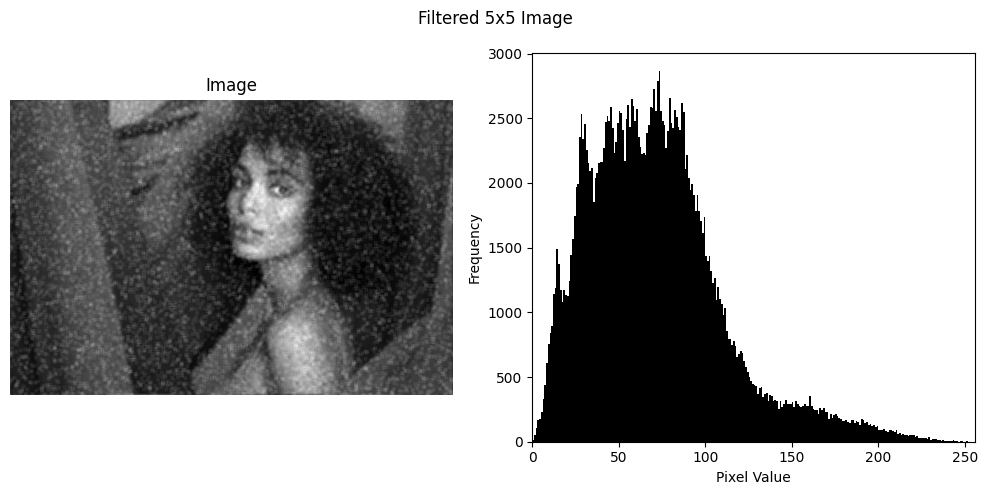

In [110]:
lp_3x3 = low_pass_filter(gray_img,3)
lp_5x5 = low_pass_filter(gray_img,5)
plot_histogram(gray_img,"","Original Image")
plot_histogram(lp_3x3,"","Filtered 3x3 Image")
plot_histogram(lp_5x5,"","Filtered 5x5 Image")

4. A bilateral filter with mask size 5 × 5 with appropriate values of σ and , set 2 d σr 2 through experimentation.

In [105]:
from skimage import data, color, img_as_float
from scipy.ndimage import gaussian_filter

In [106]:
def bilateral_filter(image, d, sigma_color, sigma_space):
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
    
    # Padding the image to handle edges
    padded_image = np.pad(image, d // 2, mode='reflect')
    filtered_image = np.zeros_like(image)

    # Create Gaussian distance kernel
    ax = np.arange(-d // 2 + 1., d // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    gaussian_spatial = np.exp(-(xx**2 + yy**2) / (2. * sigma_space**2))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + d, j:j + d]
            gaussian_intensity = np.exp(-(region - image[i, j])**2 / (2. * sigma_color**2))
            weights = gaussian_spatial * gaussian_intensity
            filtered_image[i, j] = np.sum(weights * region) / np.sum(weights)

    return np.clip(filtered_image, 0, 1)

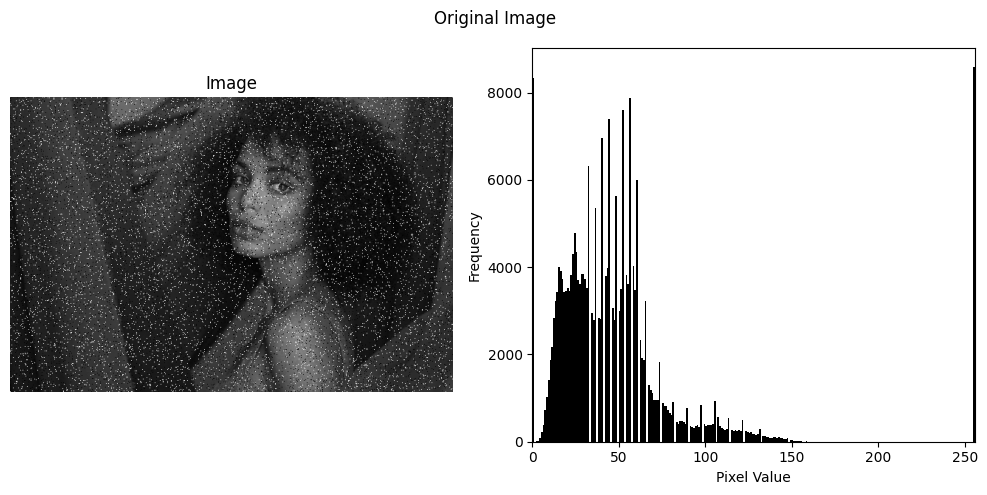

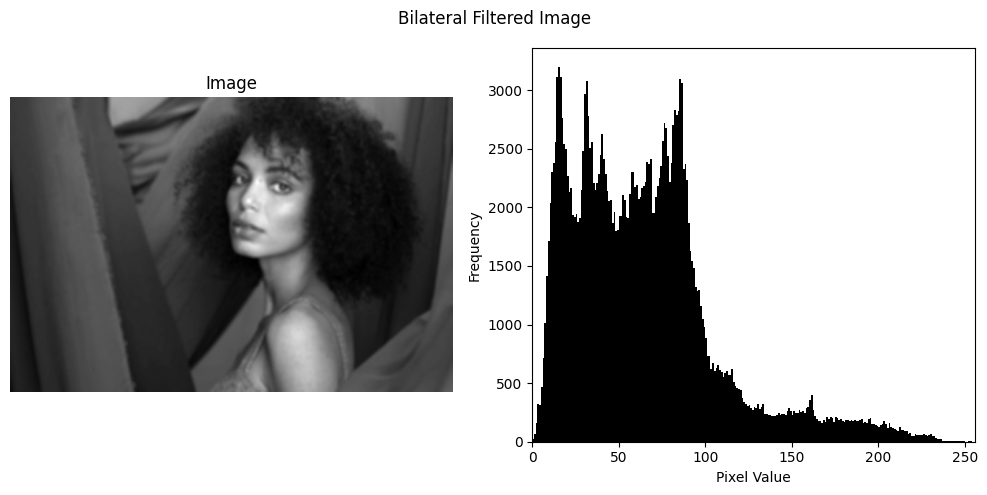

In [107]:
filtered_image = bilateral_filter(img, 5, 75, 75)
plot_histogram(gray_img,"","Original Image")
plot_histogram(filtered_image,"","Bilateral Filtered Image")

5. A Gaussian filter with mask size 5 × 5 appropriate values of σ .

In [108]:
def gaussian_filter(image, kernel_size, sigma):
    def create_gaussian_kernel(size, sigma):
        """Creates a Gaussian kernel."""
        ax = np.arange(-size // 2 + 1., size // 2 + 1.)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
        return kernel / np.sum(kernel)

    # Convert image to float
    image = img_as_float(image)
    
    # Create the Gaussian kernel
    kernel = create_gaussian_kernel(kernel_size, sigma)
    
    # Pad the image
    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='reflect')
    
    # Apply the filter
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.sum(region * kernel)
    
    return filtered_image

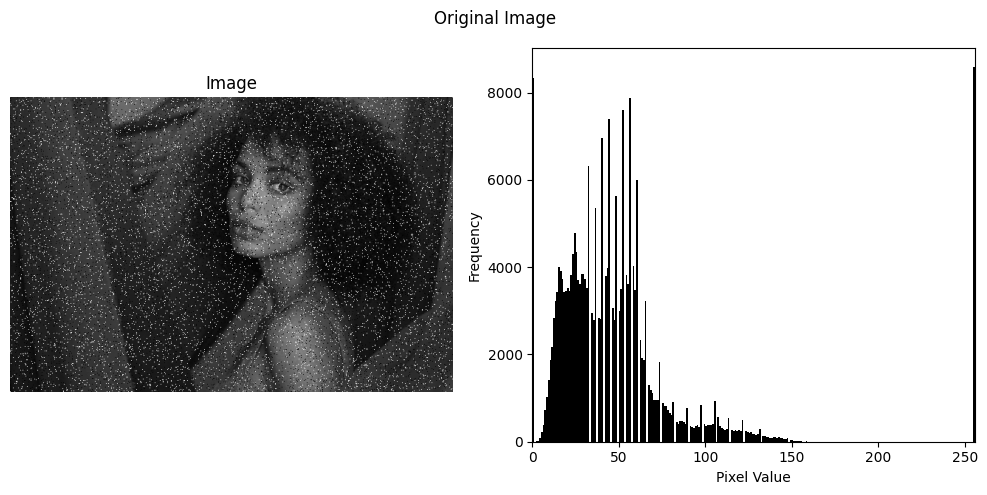

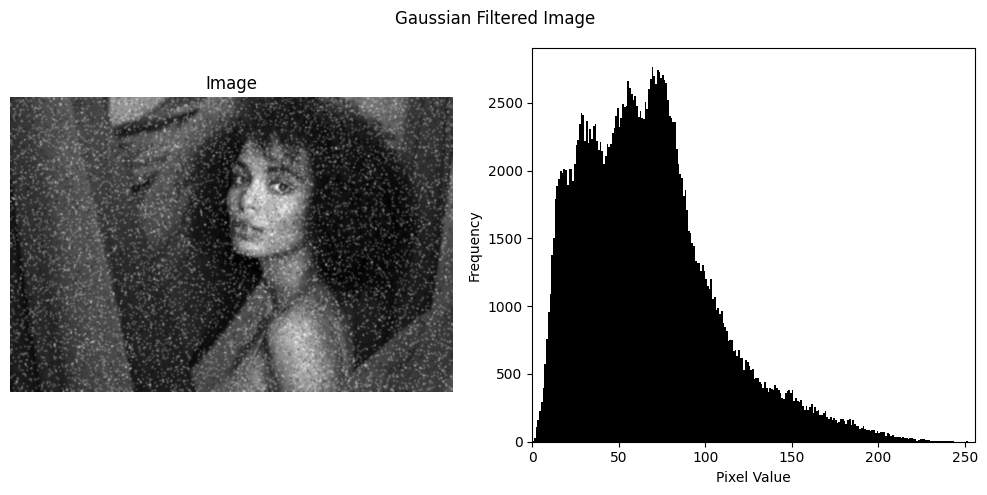

In [113]:
filtered_image = gaussian_filter(gray_img, 5, 1.0)
plot_histogram(gray_img,"","Original Image")
plot_histogram(filtered_image,"","Gaussian Filtered Image")

6. A laplacian filter with mask size 5 × 5 appropriate values of σ.

In [114]:
def laplacian_filter(image, sigma):
    # Create a 5x5 Laplacian kernel with appropriate values of sigma
    size = 5
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = ((xx**2 + yy**2 - 2 * sigma**2) / sigma**4) * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

    # Convolve the image with the Laplacian kernel
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')

    return filtered_image

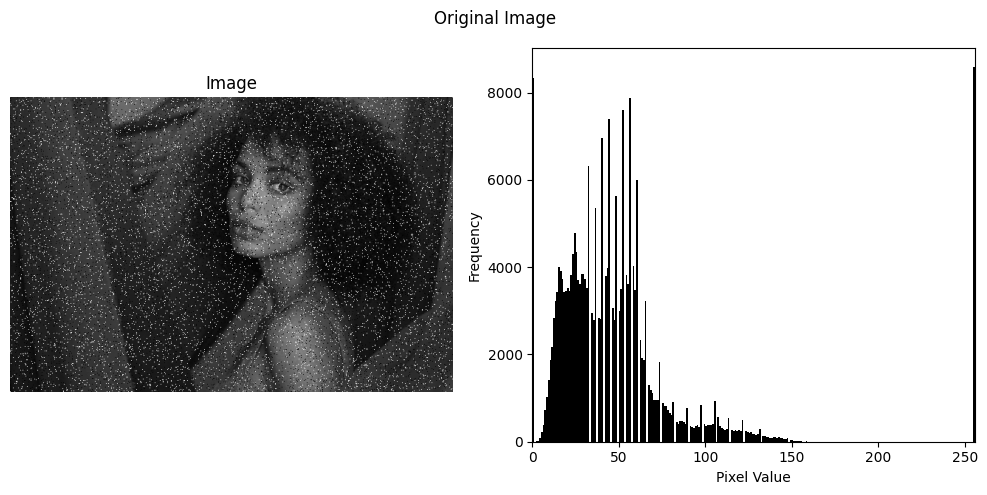

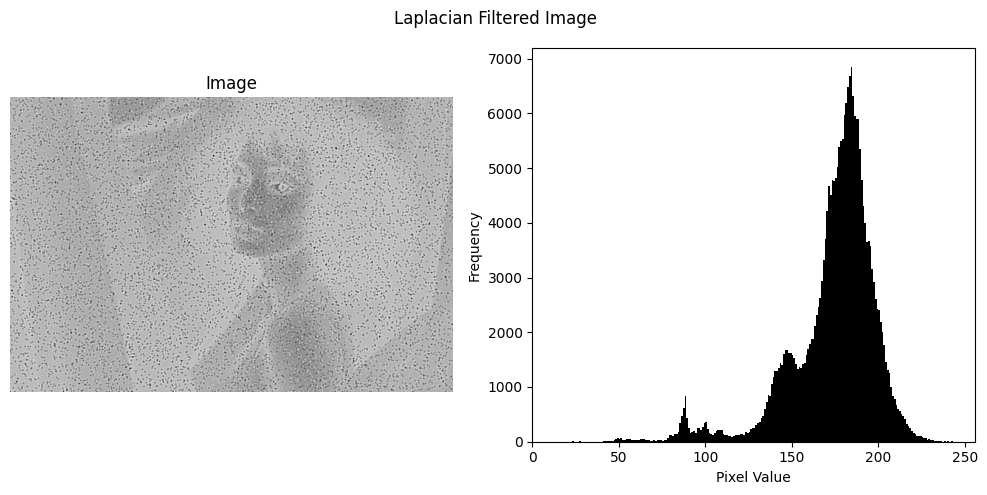

In [118]:
filtered_image = laplacian_filter(gray_img, 1.1)
plot_histogram(gray_img,"","Original Image")
plot_histogram(filtered_image,"","Laplacian Filtered Image")

7. A median filter of appropriate window size. Verify your implementation with OpenCV filtering functions.

In [126]:
def median_filter(image, kernel_size):
    # Ensure kernel size is odd
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd")
    
    # Calculate the padding size
    pad_size = kernel_size // 2

    # Pad the image
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    # Create an empty array to store the filtered image
    filtered_image = np.zeros_like(image)

    # Iterate over the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the neighborhood
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            
            # Compute the median of the neighborhood
            median_value = np.median(neighborhood)
            
            # Assign the median value to the corresponding pixel in the filtered image
            filtered_image[i, j] = median_value

    return filtered_image

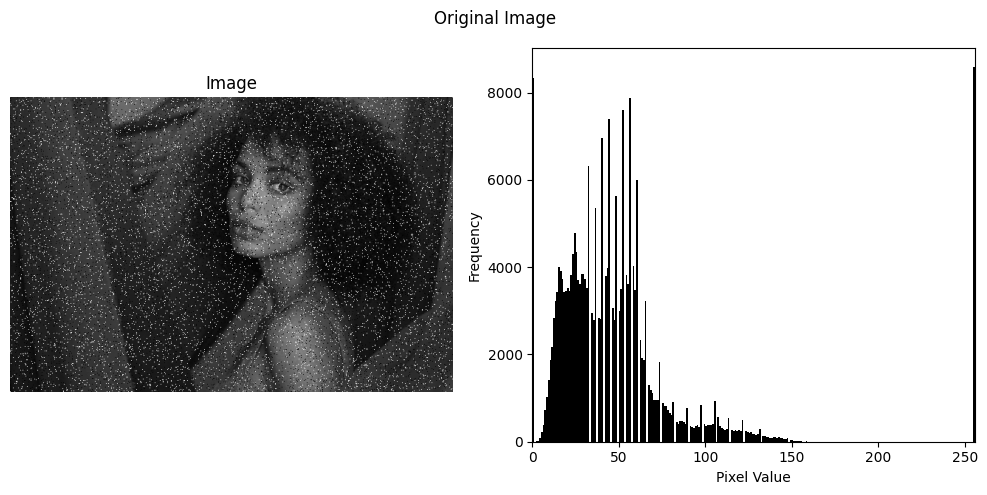

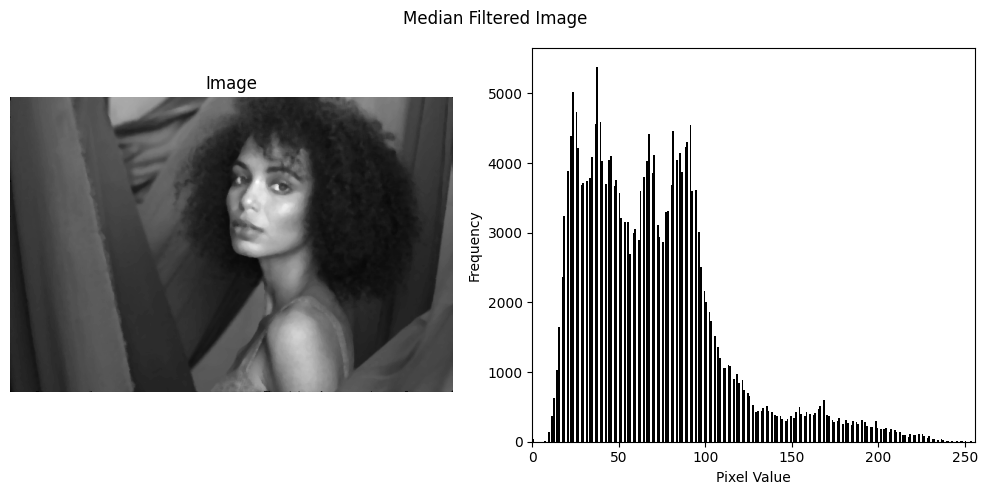

In [127]:
filtered_image = median_filter(gray_img, 5)
plot_histogram(gray_img,"","Original Image")
plot_histogram(filtered_image,"","Median Filtered Image")